## Libraries Imports

In [713]:
import pandas as pd
import numpy as ny
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Data Ingestion

In [512]:
# Reading the data files and assigning them to respective Dataframes

stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
sales = pd.read_csv('sales.csv')

In [513]:
stores.head()

,Outlet_ID,Category,Square_Meters
0,1001,Premium,14058.0
1,1002,Premium,18795.0
2,1003,Standard,3474.0
3,1004,Premium,19125.0
4,1005,Standard,3240.0


**Inference:** The dataframe, `stores`, consists of variables, `Outlet_ID`, `Category` and `Square_Meters`.

In [515]:
features.head()

,Outlet_ID,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
0,1001,2/5/2015,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73
1,1001,2/12/2015,3.6,0.67,0.0,0.0,0.0,0.0,0.0,232.37,9.73
2,1001,2/19/2015,4.4,0.66,0.0,0.0,0.0,0.0,0.0,232.42,9.73
3,1001,2/26/2015,8.1,0.68,0.0,0.0,0.0,0.0,0.0,232.45,9.73
4,1001,3/5/2015,8.1,0.69,0.0,0.0,0.0,0.0,0.0,232.49,9.73


**Inference:** The dataframe, `features` consists of variables, `Outlet_ID, Week_Period, Avg_Temp, Gas_Cost_per_Liter, Promo1_Percent, Promo2_Percent, Promo3_Percent, Promo4_Percent, Promo5_Percent, Price_Index` and `Jobless_Rate`.

In [517]:
sales.head()

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K,Special_Week
0,1001,10,2015-02-05,28.66,False
1,1001,10,2015-02-12,52.95,True
2,1001,10,2015-02-19,47.83,False
3,1001,10,2015-02-26,22.31,False
4,1001,10,2015-03-05,25.10,False


**Inference:** The dataframe, `sales`, consists of variables, `Outlet_ID`, `Section_ID`, `Week_Period`, `Period_Revenue_K` and `Special_Week`

## Exploratory Data Analysis

In [524]:
stores.shape

(45, 3)

**Inference:** Dataframe, `stores`, has 45 observations and 3 variables.

In [527]:
features.shape

(8190, 11)

**Inference:** `features` has 8190 observations and 11 variables.

In [530]:
sales.shape

(421570, 5)

**Inference:** Dataframe, `sales`, has 421570 observations and 5 variables.

In [533]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlet_ID      45 non-null     int64  
 1   Category       45 non-null     object 
 2   Square_Meters  45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


**Inference:** The data set has 3 variables, out of which 2 are numerical and 1 is categorical. All the 3 variables do not contain null values.

In [535]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outlet_ID           8190 non-null   int64  
 1   Week_Period         8190 non-null   object 
 2   Avg_Temp            8190 non-null   float64
 3   Gas_Cost_per_Liter  8190 non-null   float64
 4   Promo1_Percent      8190 non-null   float64
 5   Promo2_Percent      8190 non-null   float64
 6   Promo3_Percent      8190 non-null   float64
 7   Promo4_Percent      8190 non-null   float64
 8   Promo5_Percent      8190 non-null   float64
 9   Price_Index         7605 non-null   float64
 10  Jobless_Rate        7605 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 704.0+ KB


**Inference:** The data set has 11 variables, out of which 10 are numerical and 1 is categorical. All variables, except `Price_Index` and `Jobless_Rate`, do not contain null values. Let's deal with these variables later.

We also notice that the variable, `Week_Period` is of datatype `object`, but it should be of type, `datetime` variable. Hence, let's convert it to it's appropriate datatype for consistency, efficiency and ease of analysis.

In [538]:
features['Week_Period'] = pd.to_datetime(features['Week_Period'], format='%m/%d/%Y')

In [539]:
features['Week_Period'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8190 entries, 0 to 8189
Series name: Week_Period
Non-Null Count  Dtype         
--------------  -----         
8190 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 64.1 KB


**Inference**: We observe that the variable has been converted appropriately to `datetime64[ns]` datatype.

In [541]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Outlet_ID         421570 non-null  int64  
 1   Section_ID        421570 non-null  int64  
 2   Week_Period       421570 non-null  object 
 3   Period_Revenue_K  421570 non-null  float64
 4   Special_Week      421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Inference:** The data set has 5 variables, out of which 4 are numerical and 1 is categorical. All the variables do not contain null values.

We also notice that the variable, `Week_Period` is of datatype object, but it should be of type, `datetime` variable. Hence, let's convert it's datatype for consistency, efficiency and ease of analysis.

In [544]:
sales['Week_Period'] = pd.to_datetime(sales['Week_Period'], format='%Y-%m-%d')

In [545]:
sales['Week_Period'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Week_Period
Non-Null Count   Dtype         
--------------   -----         
421570 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB


**Inference**: We observe that the variable has been converted appropriately to `datetime64[ns]` datatype.

### Merging the Dataframes

In [548]:
stores_features = stores.merge(features, on = 'Outlet_ID')

In [549]:
stores_features.sample(10)

,Outlet_ID,Category,Square_Meters,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
994,1006,Premium,18813.0,2016-09-16,29.4,0.93,0.00,0.00,0.00,0.00,0.00,239.34,8.31
2178,1012,Standard,10427.0,2018-06-21,30.7,0.99,2356.59,195.09,320.70,5087.61,2684.64,NaN,NaN
2647,1015,Standard,11496.0,2016-12-30,-0.3,0.94,4872.60,46683.30,167.02,908.82,5212.26,150.31,9.44
7617,1042,Express,3687.0,2018-01-25,15.4,0.94,11.94,11.76,0.00,0.00,514.19,145.30,8.28
951,1006,Premium,18813.0,2015-11-19,11.7,0.73,0.00,0.00,0.00,0.00,0.00,234.75,8.41
6736,1038,Express,3687.0,2015-02-19,12.7,0.77,0.00,0.00,0.00,0.00,0.00,139.18,16.77
1924,1011,Premium,19277.0,2017-02-03,15.7,0.89,76363.77,2936.24,205.84,55637.50,9627.54,246.03,8.20
341,1002,Premium,18795.0,2018-02-22,9.0,0.95,10361.03,6531.30,24.87,1582.46,4529.76,246.46,7.48
6746,1038,Express,3687.0,2015-04-30,19.7,0.82,0.00,0.00,0.00,0.00,0.00,139.02,16.92
3762,1021,Standard,13022.0,2017-06-08,26.4,0.91,10583.86,16.20,139.57,1127.84,6856.17,243.53,8.27


In [559]:
#stores_features.rename(columns={'Week_Period': 'Collection_Date'}, inplace=True)

In [561]:
stores_features.shape

(8190, 13)

In [562]:
all_tables = stores_features.merge(sales, on = ['Outlet_ID', 'Week_Period'], how = 'inner')
all_tables.head()

,Outlet_ID,Category,Square_Meters,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate,Section_ID,Period_Revenue_K,Special_Week
0,1001,Premium,14058.0,2015-02-05,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73,10,28.66,False
1,1001,Premium,14058.0,2015-02-05,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73,20,58.20,False
2,1001,Premium,14058.0,2015-02-05,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73,30,15.80,False
3,1001,Premium,14058.0,2015-02-05,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73,40,45.95,False
4,1001,Premium,14058.0,2015-02-05,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73,50,37.06,False


The weekly date values [YYYY-MM-DD format] in 'Week_period' variable in `features` dataframe exists from `2015-02-05 and 2018-07-26`, while in the `sales` dataframe, it only exists between `2015-02-05 and 2017-10-26`, the values in the common range repeat. If we perform `left merge` on the data, we get missing values on `Period_Revenue_K` and `Section_ID` columns. We do not perform left merge here because missing value treatment cannot be performed on the variable, Period_Revenue_K, as it is the dependent variable. 'Section_ID' column can also not be filled/imputed with existing values. So, we perform `inner` join.

We can also safely merge with the 'Week_period' column, as, though the repeat of values in the common range is not a necessity, it is observed and to `maintain de-duplication` and `prevent redundancy`, we can `safely merge` the column into one in the new dataframe.

In [565]:
all_tables.shape

(421570, 16)

**Inference:** The table formed by merging the 3 tables, `all_tables`, has 421570 observations and 16 variables.

In this table, ideally, the datatype of `Outlet_ID`, `Section_ID` must be `object`. So, let's convert it.

In [568]:
all_tables['Outlet_ID'] = all_tables['Outlet_ID'].astype('object')
all_tables['Section_ID'] = all_tables['Section_ID'].astype('object')

### Statistical Summary

In [570]:
all_tables.describe()

,Square_Meters,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate,Period_Revenue_K
count,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,12702.363245,2016-06-17 17:15:55.656237312,15.605277,0.887789,3885.112198,1319.961417,702.131456,1624.698439,2494.158559,188.322189,9.552442,18.378428
min,3240.000000,2015-02-05 00:00:00,-18.900000,0.650000,0.000000,-398.640000,-43.650000,0.000000,0.000000,138.670000,4.650000,-5.740000
25%,8699.000000,2015-10-08 00:00:00,8.200000,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,145.220000,8.270000,2.390000
50%,13022.000000,2016-06-17 00:00:00,16.700000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,200.550000,9.440000,8.750000
75%,18813.000000,2017-02-24 00:00:00,23.500000,0.990000,4213.580000,3.300000,6.810000,637.940000,3252.060000,233.660000,10.290000,23.240000
max,20404.000000,2017-10-26 00:00:00,37.900000,1.180000,132970.140000,156779.310000,212445.910000,101212.280000,162778.920000,249.960000,17.180000,797.060000
std,5665.249574,NaN,10.249250,0.121214,9078.578879,7626.808177,8293.310116,5841.794931,6311.443910,43.075209,2.236139,26.117873


Observations:
--------------
- The smallest store size is `3240` and the largest store size is `20404`.
- Weekly data from `2015-02-05` to `2018-07-26` is present in the table.
- The average temperature in the store localities ranges from `-21°` to `38.9°`.
- The promotional discount on all the 5 schemes is 0 in atleast 50% of the weekly values.
- Missing values are present in columns, `Price_Index`and `Jobless_Rate`.

### Categorical Summary

In [578]:
all_tables.describe(include=['object'])

,Outlet_ID,Category,Section_ID
count,421570,421570,421570
unique,45,3,81
top,1013,Premium,10
freq,10474,215478,6435


**Inference:** We can notice the number of unique categories, the category of maximum count and its frequency for of the variables present the data.

### Correlation Identification

In [581]:
corr = all_tables.corr(numeric_only = True)
corr

,Square_Meters,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate,Period_Revenue_K,Special_Week
Square_Meters,1.000000,-0.058296,0.003121,0.169786,0.078372,0.033641,0.127333,0.153009,-0.003301,-0.068207,0.243827,0.000593
Avg_Temp,-0.058296,1.000000,0.143098,-0.026435,-0.179693,-0.056018,-0.050281,-0.014847,0.182137,0.096732,-0.002303,-0.155980
Gas_Cost_per_Liter,0.003121,0.143098,1.000000,0.296892,0.029473,0.016660,0.166852,0.214497,-0.164812,-0.033278,-0.000299,-0.077849
Promo1_Percent,0.169786,-0.026435,0.296892,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105200,0.047173,-0.003521
Promo2_Percent,0.078372,-0.179693,0.029473,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003552,-0.041435,0.020717,0.207604
Promo3_Percent,0.033641,-0.056018,0.016660,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018055,0.038562,0.266471
Promo4_Percent,0.127333,-0.050281,0.166852,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002048,-0.076555,0.037468,0.011565
Promo5_Percent,0.153009,-0.014847,0.214497,0.415050,0.131735,0.042471,0.303370,1.000000,0.067905,-0.120384,0.050465,-0.015235
Price_Index,-0.003301,0.182137,-0.164812,0.010915,-0.003552,-0.005839,-0.002048,0.067905,1.000000,-0.299825,-0.020921,-0.001940
Jobless_Rate,-0.068207,0.096732,-0.033278,-0.105200,-0.041435,-0.018055,-0.076555,-0.120384,-0.299825,1.000000,-0.025864,0.010459


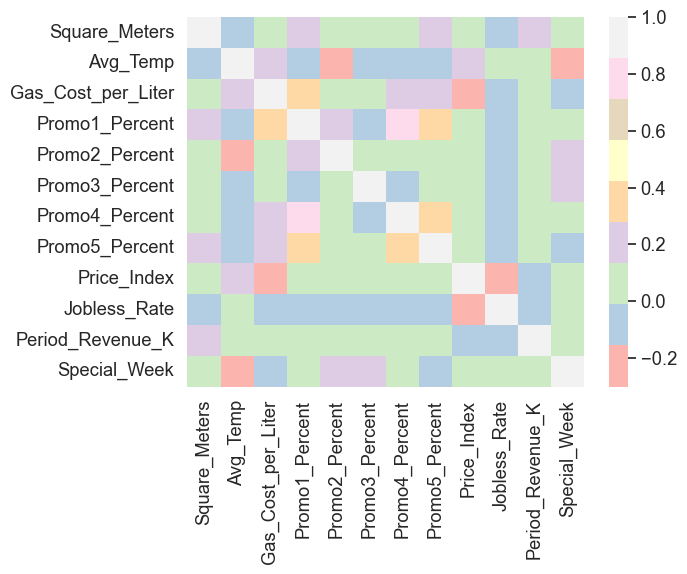

In [582]:
sb.heatmap(corr, cmap = "Pastel1")
plt.show()

### Missing value Treatment

Let's first plot the variables with time with 5 random Outlet_IDs to view their trends.

**`Price_Index`:**

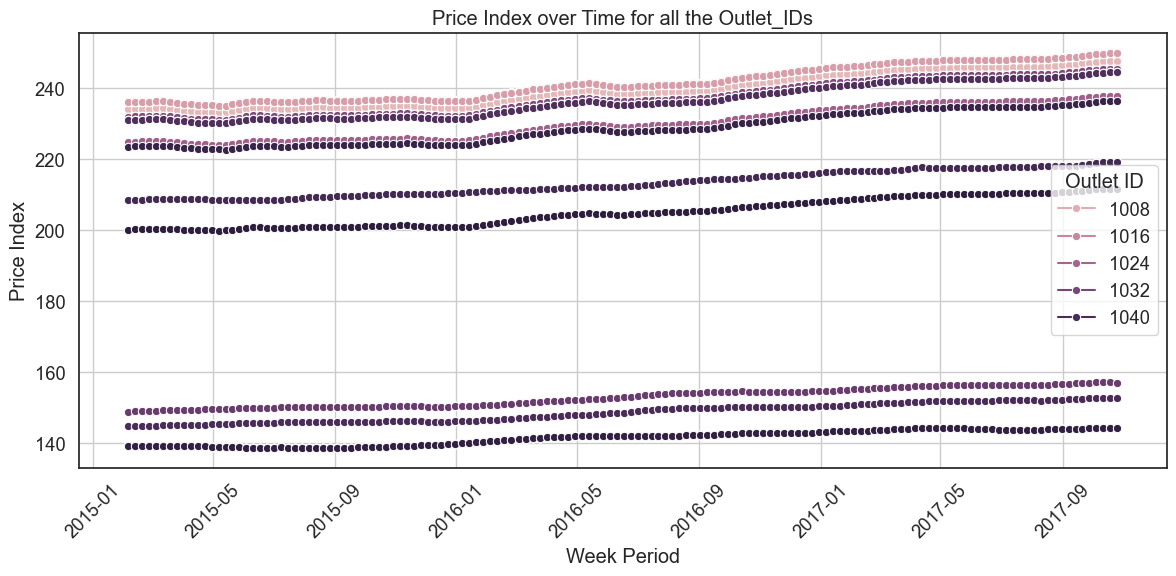

In [589]:
plt.figure(figsize=(12, 6))
sb.lineplot(data=all_tables, x='Week_Period', y='Price_Index', hue='Outlet_ID', marker='o')
plt.title('Price Index over Time for all the Outlet_IDs')
plt.xlabel('Week Period')
plt.ylabel('Price Index')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Outlet ID')
plt.grid()
plt.tight_layout()
plt.show()

**`Jobless_Rate`:**

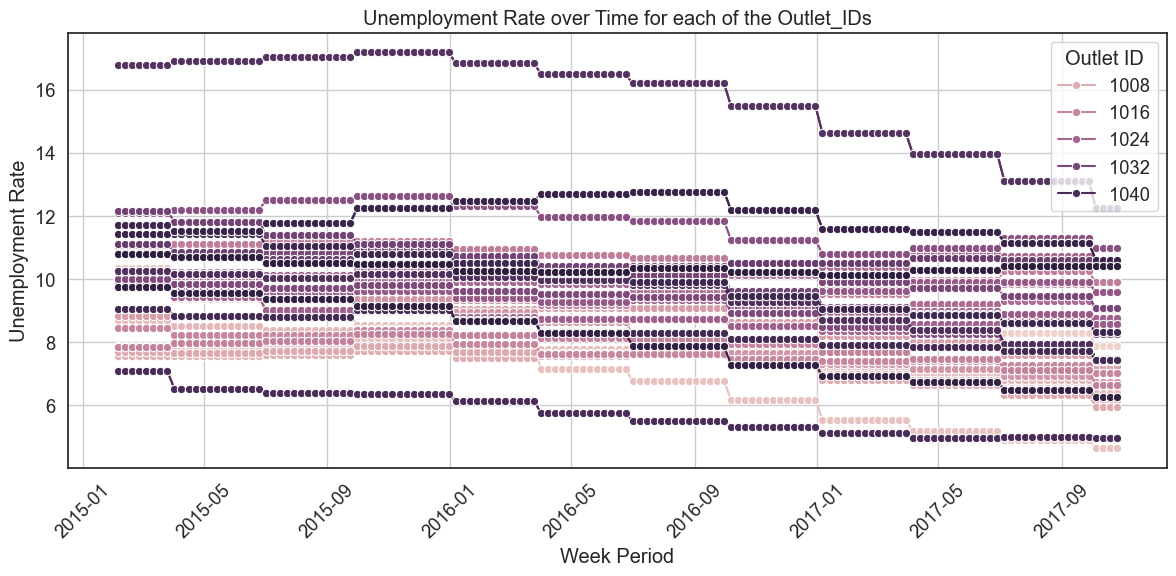

In [591]:
plt.figure(figsize=(12, 6))
sb.lineplot(data=all_tables, x='Week_Period', y='Jobless_Rate', hue='Outlet_ID', marker='o')
plt.title('Unemployment Rate over Time for each of the Outlet_IDs')
plt.xlabel('Week Period')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Outlet ID')
plt.grid()
plt.tight_layout()
plt.show()

We observe that there is `a slightly upward trend` in the values of `Price_Index` and `variations across quarters` in the `Jobless_Rate` values.

However, the changes are `marginal` and using `time-series forecasting to fill the missing value would be a very complex process`. Hence, we are `not using time-series forecasting`. We notice that none of the variables are strongly correlated these variables, hence, we `cannot use regression imputation` too to fill the missing values.

Hence, for `simplicity and consideration of trends`, let's perform `Forward Fill` to handle the missing values.

In [595]:
all_tables['Price_Index'] = all_tables['Price_Index'].ffill()
all_tables['Jobless_Rate'] = all_tables['Jobless_Rate'].ffill()

In [596]:
all_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Outlet_ID           421570 non-null  object        
 1   Category            421570 non-null  object        
 2   Square_Meters       421570 non-null  float64       
 3   Week_Period         421570 non-null  datetime64[ns]
 4   Avg_Temp            421570 non-null  float64       
 5   Gas_Cost_per_Liter  421570 non-null  float64       
 6   Promo1_Percent      421570 non-null  float64       
 7   Promo2_Percent      421570 non-null  float64       
 8   Promo3_Percent      421570 non-null  float64       
 9   Promo4_Percent      421570 non-null  float64       
 10  Promo5_Percent      421570 non-null  float64       
 11  Price_Index         421570 non-null  float64       
 12  Jobless_Rate        421570 non-null  float64       
 13  Section_ID          421570 no

**Inference:** The missing values have been replaced.

## Outliers Identification

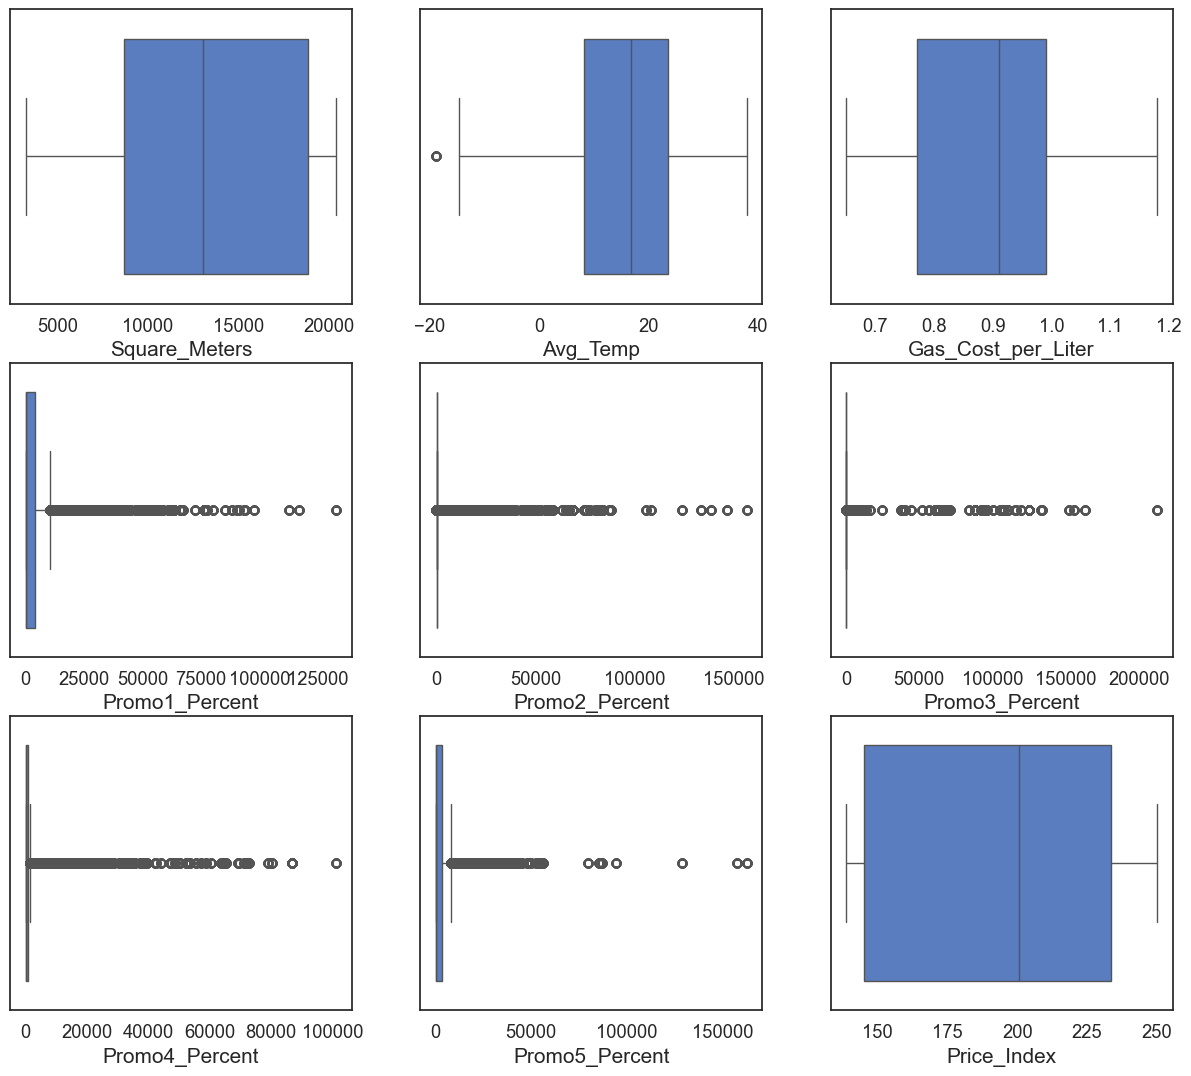

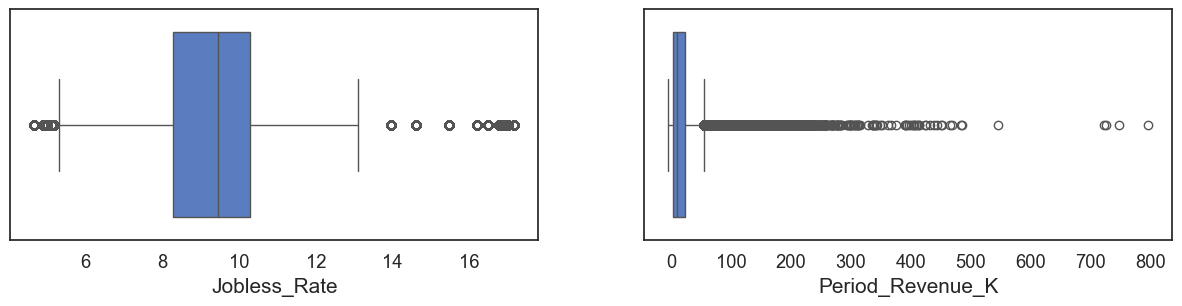

In [599]:
num = all_tables[['Square_Meters','Avg_Temp','Gas_Cost_per_Liter','Promo1_Percent','Promo2_Percent','Promo3_Percent','Promo4_Percent','Promo5_Percent','Price_Index']]

fig, ax = plt.subplots(3, 3, figsize=(15, 13))

for variable, subplot in zip(num.columns, ax.flatten()):
    z = sb.boxplot(x = num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 15)                                 # set the x-axis label

num2 = all_tables[['Jobless_Rate','Period_Revenue_K']]

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

for variable, subplot in zip(num2.columns, ax.flatten()):
    z = sb.boxplot(x = num2[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 15)

We notice the following from the variables' values:
- Extreme negative values of average temperature in some outlets on a few weeks.
- A lot more profitability than expected, from the IQR range.
- There are outliers on both sides of the expected unemployment rate across the different outlets over the weeks.

As none of the outliers seem like they are data-entry errors, we are not treating the outliers.

## Visualizations of trends, patterns, and relationships

In [602]:
sb.set_theme(style="white", palette="muted", font_scale=1.2)

### Store Size vs. Weekly Sales

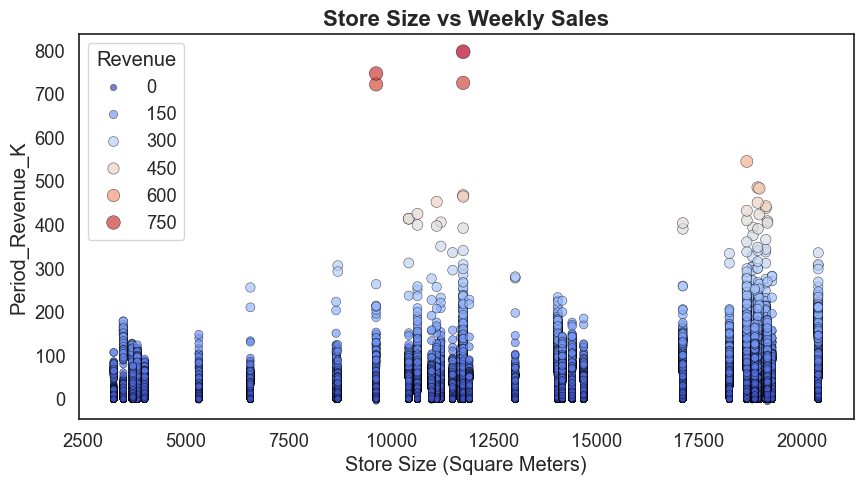

In [604]:
plt.figure(figsize=(10, 5))
sb.scatterplot(
    data=all_tables,
    x='Square_Meters',
    y='Period_Revenue_K',
    hue='Period_Revenue_K',
    size='Period_Revenue_K',
    sizes=(20, 100),
    palette='coolwarm',
    alpha=0.7,
    edgecolor='black'
)
plt.title("Store Size vs Weekly Sales", fontsize=16, weight='bold')
plt.xlabel("Store Size (Square Meters)")
plt.ylabel("Period_Revenue_K")
plt.legend(title="Revenue")
plt.show()

#### Pearson Correlation Coefficient

In [606]:
correlation = all_tables['Square_Meters'].corr(all_tables['Period_Revenue_K'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.24382679269584534


We notice that the weekly revenue is `evenly distributed` across the different sizes of stores. This is confirmed by the Pearson Correlation coefficient, proving that there is no strong relationship between store size and weekly sales.

### Store Category vs Weekly Sales

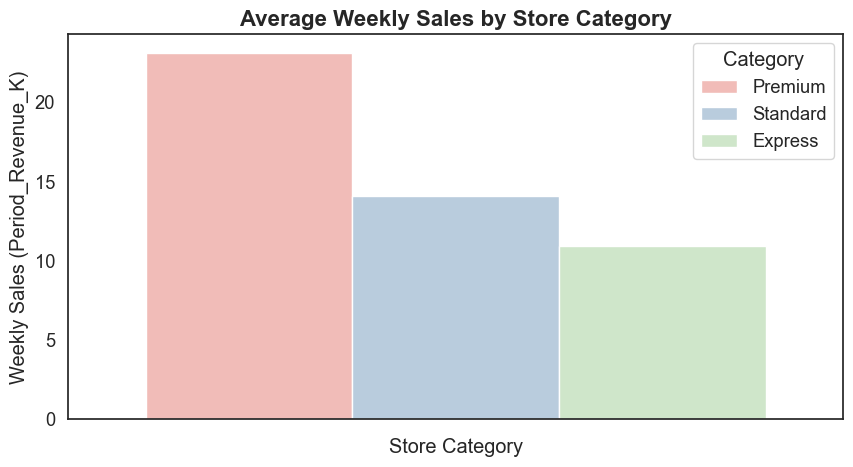

In [609]:
plt.figure(figsize=(10, 5))
sb.barplot(
    data=all_tables,
    hue='Category',
    y='Period_Revenue_K',
    legend = True,
    palette="Pastel1",  # Stunning green-yellow gradient
    errorbar=None
)
plt.title("Average Weekly Sales by Store Category", fontsize=16, weight='bold')
plt.xlabel("Store Category")
plt.ylabel("Weekly Sales (Period_Revenue_K)")
plt.xticks(rotation=45)
plt.show()

We observe that `Premium` category of stores contribute to the largest revenue, followed by the `Standard` category, and then, lastly followed by `Express` category.

**ANOVA Test:**

Let's perform ANOVA Test to see if differences between categories are statistically significant.

In [613]:
from scipy.stats import f_oneway
categories = [group['Period_Revenue_K'].values for name, group in all_tables.groupby('Category')]
f_stat, p_value = f_oneway(*categories)
print("ANOVA Test - F-statistic:", f_stat, "P-value:", p_value)

ANOVA Test - F-statistic: 7764.423213338643 P-value: 0.0


As the P-value of the test (0.0) is lesser than the significance level, we can reject the NULL hypothesis to conclude that there is significant difference in weekly revenue actoss the three categories. 

We can conclude that the `Premium` category of stores makes the most revenue out of the three categories.

### Special Weeks vs Weekly Sales

Special_Week
False    18.286643
True     19.591176
Name: Period_Revenue_K, dtype: float64


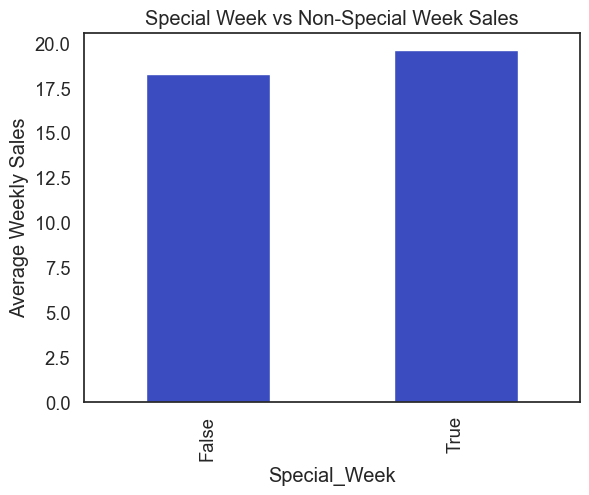

In [617]:
avg_revenue_special = all_tables.groupby('Special_Week')['Period_Revenue_K'].mean()
print(avg_revenue_special)
avg_revenue_special.plot(kind='bar', colormap= 'coolwarm', title='Special Week vs Non-Special Week Sales')
plt.ylabel('Average Weekly Sales')
plt.show()

### Promotional Discounts vs. Weekly Sales

In [619]:
promo_columns = ['Promo1_Percent', 'Promo2_Percent', 'Promo3_Percent', 'Promo4_Percent', 'Promo5_Percent']
correlation = all_tables[promo_columns + ['Period_Revenue_K']].corr()
print(correlation['Period_Revenue_K'])

Promo1_Percent      0.047173
Promo2_Percent      0.020717
Promo3_Percent      0.038562
Promo4_Percent      0.037468
Promo5_Percent      0.050465
Period_Revenue_K    1.000000
Name: Period_Revenue_K, dtype: float64


### Correlation between Sum of Discounts and Weekly Sales

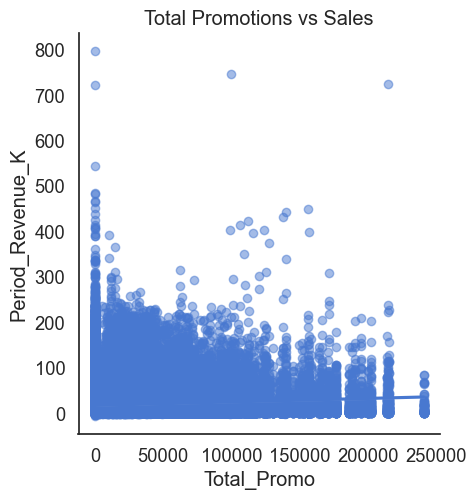

In [621]:
all_tables['Total_Promo'] = all_tables[promo_columns].sum(axis=1)
sb.lmplot(data=all_tables, x='Total_Promo', y='Period_Revenue_K', scatter_kws={'alpha':0.5})
plt.title('Total Promotions vs Sales')
plt.show()

### Effect of Promotions on the Special Weeks

<Axes: title={'center': 'Effect of Promotions on Sales'}, xlabel='Special_Week'>

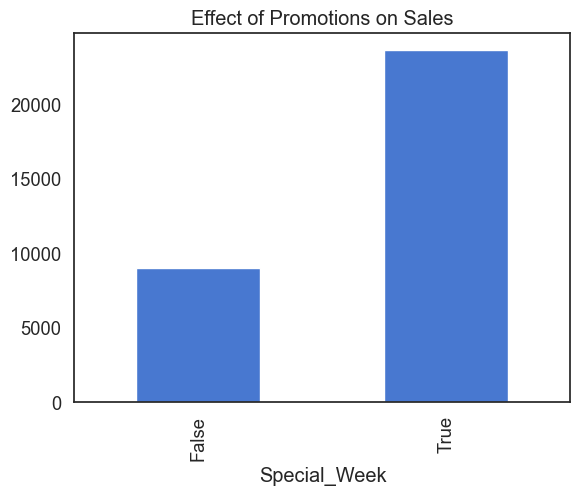

In [623]:
promo_impact = all_tables.groupby('Special_Week')['Total_Promo'].mean()
promo_impact.plot(kind='bar', title='Effect of Promotions on Sales')

In [624]:
import scipy.stats as stats
groups = all_tables[['Period_Revenue_K','Total_Promo', 'Special_Week']].groupby('Special_Week')

results = {}
for name, group in groups:
    # Correlation calculation
    correlation, p_value = stats.pearsonr(group['Period_Revenue_K'], group['Total_Promo'])
    results[name] = {
        'Correlation': correlation,
        'P-Value (Correlation)': p_value}

results_df = pd.DataFrame(results).T
print(results_df)

       Correlation  P-Value (Correlation)
False     0.057543          1.225801e-284
True      0.105566           2.921800e-74


While the correlation is statistically significant (𝑝 < 0.05), the effect size (r=0.05, r=0.1) is too small to be practically meaningful.

In this case, the two variables have a negligible linear relationship, even though the result is statistically significant.

### T-Test

In [627]:
from scipy.stats import ttest_ind
special = all_tables[all_tables['Special_Week'] == 1]['Period_Revenue_K']
non_special = all_tables[all_tables['Special_Week'] == 0]['Period_Revenue_K']
t_stat, p_value = ttest_ind(special, non_special)
print("T-test - T-statistic:", t_stat, "P-value:", p_value)

T-test - T-statistic: 8.294736642372714 P-value: 1.0914077831224392e-16


Since the p-value is lesser than the significance level, we can conclude that there significant difference in the weekly revenue between the special and non-special weeks. 

**The special weeks clearly make more revenue than the non-special weeks.**

### Fuel Price vs. Weekly Sales

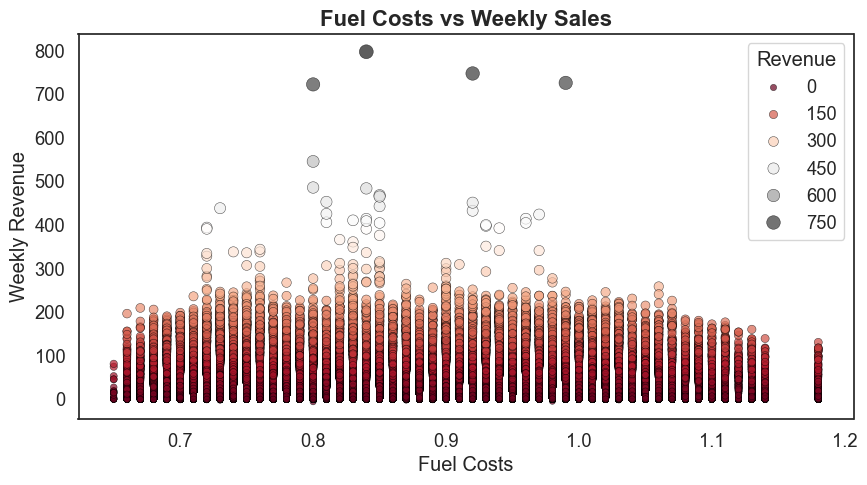

In [631]:
plt.figure(figsize=(10, 5))
sb.scatterplot(
    data=all_tables,
    x='Gas_Cost_per_Liter',
    y='Period_Revenue_K',
    hue='Period_Revenue_K',
    size='Period_Revenue_K',
    sizes=(20, 100),
    palette='RdGy',
    alpha=0.7,
    edgecolor='black'
)
plt.title("Fuel Costs vs Weekly Sales", fontsize=16, weight='bold')
plt.xlabel("Fuel Costs")
plt.ylabel("Weekly Revenue")
plt.legend(title="Revenue")
plt.show()

In [632]:
correlation = all_tables['Gas_Cost_per_Liter'].corr(all_tables['Period_Revenue_K'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.0002987893954992755


We notice that the weekly sales is `evenly distributed` with the fuel costs across the regions. The Pearson Correlation coefficient is very close to 0, proving that there is no relationship between fuel price and weekly sales.

### Average Temperature vs. Weekly Sales

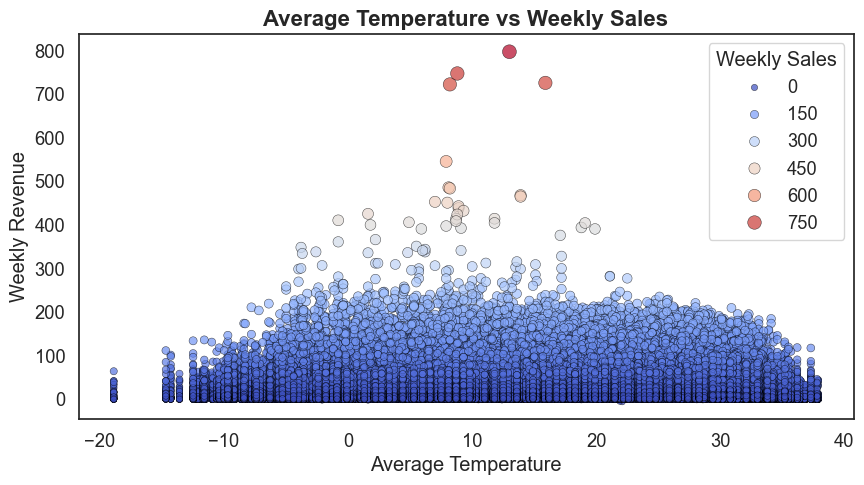

In [635]:
plt.figure(figsize=(10, 5))
sb.scatterplot(
    data=all_tables,
    x='Avg_Temp',
    y='Period_Revenue_K',
    hue='Period_Revenue_K',
    size='Period_Revenue_K',
    sizes=(20, 100),
    palette='coolwarm',
    alpha=0.7,
    edgecolor='black'
)
plt.title("Average Temperature vs Weekly Sales", fontsize=16, weight='bold')
plt.xlabel("Average Temperature")
plt.ylabel("Weekly Revenue")
plt.legend(title="Weekly Sales")
plt.show()

In [636]:
correlation = all_tables['Avg_Temp'].corr(all_tables['Period_Revenue_K'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.0023026882551348774


We notice that the weekly sales is `evenly distributed` across the regions with different average temperatures weekly. The Pearson Correlation coefficient is very close to 0, proving that there is no correlation between average temperature and weekly sales.

In [638]:
correlation = all_tables['Total_Promo'].corr(all_tables['Period_Revenue_K'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.0652368442446181


We can conclude from the above Pearson Correlation Coefficient Tests that there is `no correlation` between the different promotional discounts, as well as, the sum of discounts to the weekly sales.

### Price_Index vs. Weekly Sales

C:\Users\Vani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


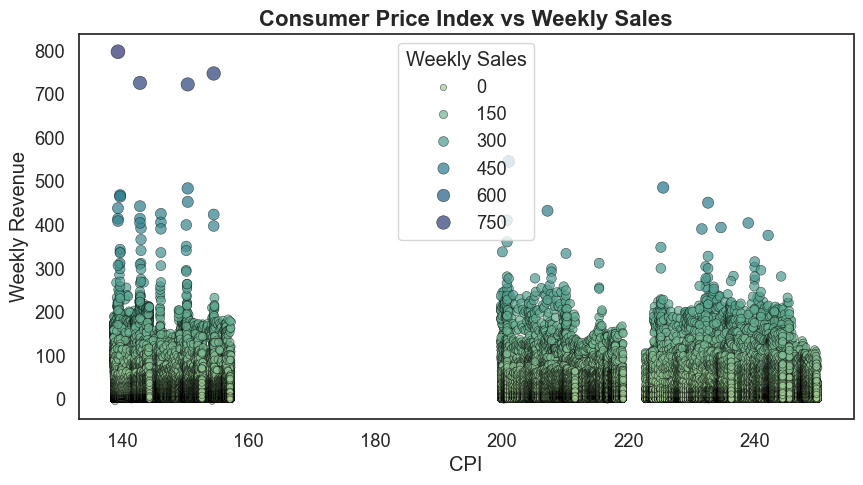

In [641]:
plt.figure(figsize=(10, 5))
sb.scatterplot(
    data=all_tables,
    x='Price_Index',
    y='Period_Revenue_K',
    hue='Period_Revenue_K',
    size='Period_Revenue_K',
    sizes=(20, 100),
    palette='crest',
    alpha=0.7,
    edgecolor='black'
)
plt.title("Consumer Price Index vs Weekly Sales", fontsize=16, weight='bold')
plt.xlabel("CPI")
plt.ylabel("Weekly Revenue")
plt.legend(title="Weekly Sales")
plt.show()

In [642]:
correlation = all_tables['Price_Index'].corr(all_tables['Period_Revenue_K'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.020921401951262946


We can conclude that there is no strong correlation between the variables, `Price_index` and `Period_Revenue_K` from the above plot and Pearson Correlation Coefficient value.

### Jobless_Rate vs. Weekly Sales

C:\Users\Vani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


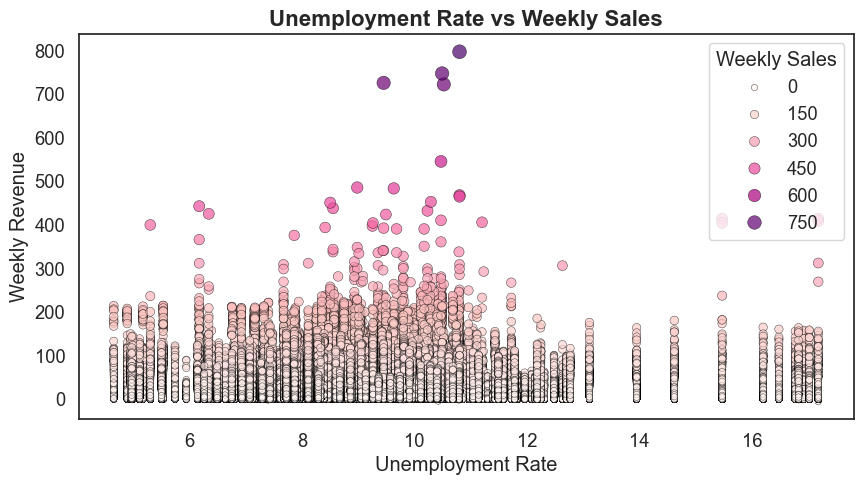

In [645]:
plt.figure(figsize=(10, 5))
sb.scatterplot(
    data=all_tables,
    x='Jobless_Rate',
    y='Period_Revenue_K',
    hue='Period_Revenue_K',
    size='Period_Revenue_K',
    sizes=(20, 100),
    palette='RdPu',
    alpha=0.7,
    edgecolor='black'
)
plt.title("Unemployment Rate vs Weekly Sales", fontsize=16, weight='bold')
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Revenue")
plt.legend(title="Weekly Sales")
plt.show()

In [646]:
correlation = all_tables['Jobless_Rate'].corr(all_tables['Period_Revenue_K'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.02586361676632264


We can conclude that there is no strong correlation between the variables, `Jobless_Rate` and `Period_Revenue_K` from the above plot and Pearson Correlation Coefficient value.

In [679]:
all_tables.shape

(421570, 17)

## Revenue Analysis

Analysis also present in Tableau Workbook attached (Tableau Public link: https://public.tableau.com/app/profile/shruti.sharada.s/viz/Navsoft_Test/Outlet-wiseWeeklySales?publish=yes)

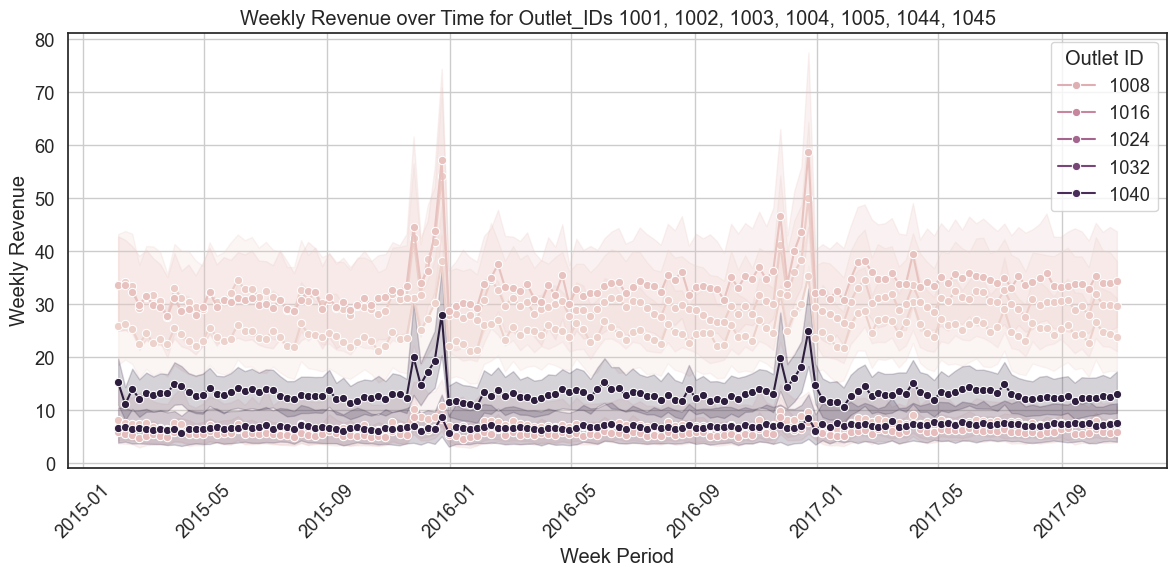

In [649]:
outlet_wise = all_tables[all_tables['Outlet_ID'].isin([1001, 1002, 1003, 1004, 1005, 1044, 1045])]
outlet_wise = outlet_wise.sort_values(by='Week_Period')
plt.figure(figsize=(12, 6))
sb.lineplot(data=outlet_wise, x='Week_Period', y='Period_Revenue_K', hue='Outlet_ID', marker='o')
plt.title('Weekly Revenue over Time for Outlet_IDs 1001, 1002, 1003, 1004, 1005, 1044, 1045')
plt.xlabel('Week Period')
plt.ylabel('Weekly Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Outlet ID')
plt.grid()
plt.tight_layout()
plt.show()

Key observations:
----------
- The weekly sales revenue for all given weeks are in the order of their Outlet_IDs - 1001 has largest revenue, followed by 1002, and lastly by 1045.
- The three largest peaks are at 2015-12-24, 2016-12-23, 2015-11-26, all on Outlet_ID 1001, with values 2746, 2611 and 2249.
- The larget 2 peaks of outlet-wise monthly sales are by 1020 on December 2015 and December 2016.
- Outlet-wise yearly peaks - 1014 in 2015, 1004 in 2016 and 2017.
- Section-wise peak - 2015-11-26 by Section_ID 720 in Outlet_ID 1010. The second largest peak is by the same section_id at Outlet_ID 1035.

## Key insights

In [651]:
top_stores = all_tables.groupby('Outlet_ID')['Period_Revenue_K'].sum().sort_values(ascending=False)
top_stores.head()

Outlet_ID
1020    346607.70
1004    344475.59
1014    332349.88
1013    329495.13
1002    316689.52
Name: Period_Revenue_K, dtype: float64

Maximum revenue overall is by Outlet_ID 1020. The top 5 performing outlets are as above.

In [652]:
avg_sales_by_outlet = all_tables.groupby('Outlet_ID')['Period_Revenue_K'].mean().sort_values(ascending=False)
avg_sales_by_outlet.head()

Outlet_ID
1020    33.934570
1004    33.535396
1014    33.102578
1013    31.458386
1002    30.932752
Name: Period_Revenue_K, dtype: float64

The mean top performing outlets are same as the overall top performing outlets.

In [653]:
avg_sales_by_dept = all_tables.groupby('Section_ID')['Period_Revenue_K'].mean().sort_values(ascending=False)
avg_sales_by_dept.head()

Section_ID
920    86.485621
950    80.298030
380    70.254183
720    58.151533
650    52.257832
Name: Period_Revenue_K, dtype: float64

The top-performing sections are as above.

In [654]:
avg_sales_by_dept.tail()

Section_ID
510    0.024806
390    0.012500
780    0.007489
430    0.000000
470   -0.008839
Name: Period_Revenue_K, dtype: float64

The least performing sections are as above.

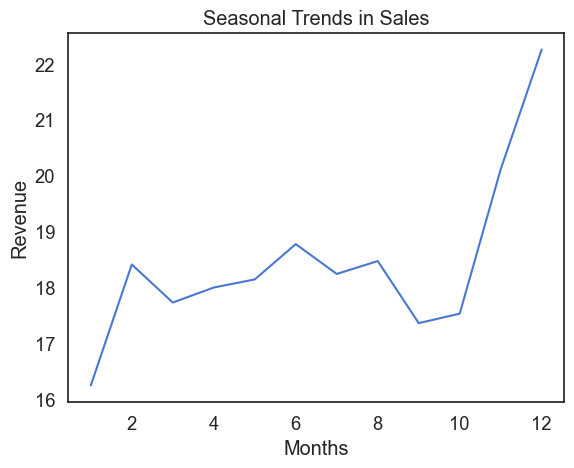

In [655]:
sales_trends = all_tables.groupby(all_tables['Week_Period'].dt.month)['Period_Revenue_K'].mean()
sales_trends.plot(kind='line', title='Seasonal Trends in Sales', xlabel = 'Months', ylabel = 'Revenue')
plt.show()

Through the above trend-line, we can observe that December is the most performing month of the year, which agrees with the fact that revenue is more on Special_Weeks.

## Forecasting revenue

Though the trends of each of the departments in each of the outlets vary with time, we cannot use time-series forecating here, as testing for stationarity and other assumptions of time-series forecasting for (45*99 =) 4455 models for each of the departments in each outlet is too complex.

Hence, we use `XGBoost algorithm` for revenue forecasting.

In [696]:
df = all_tables.sort_values(['Outlet_ID', 'Section_ID', 'Week_Period']).reset_index(drop=True)

# Create lagged features for revenue
for lag in range(1, 4):  # Previous 3 weeks as features
    df[f'Revenue_lag_{lag}'] = df.groupby(['Outlet_ID', 'Section_ID'])['Period_Revenue_K'].shift(lag)

# Drop rows with NaN values (from lagging)
df.dropna(inplace=True)

# Display transformed data
print(df.head())

  Outlet_ID Category  Square_Meters Week_Period  Avg_Temp  Gas_Cost_per_Liter  \
3      1001  Premium        14058.0  2015-02-26       8.1                0.68   
4      1001  Premium        14058.0  2015-03-05       8.1                0.69   
5      1001  Premium        14058.0  2015-03-12      14.3                0.70   
6      1001  Premium        14058.0  2015-03-19      12.5                0.72   
7      1001  Premium        14058.0  2015-03-26      10.8                0.72   

   Promo1_Percent  Promo2_Percent  Promo3_Percent  Promo4_Percent  \
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   
5             0.0             0.0             0.0             0.0   
6             0.0             0.0             0.0             0.0   
7             0.0             0.0             0.0             0.0   

   Promo5_Percent  Price_Index  Jobless_Rate Section_ID  Period_Revenue_K  \
3             0.0    

In [700]:
df['Year'] = df['Week_Period'].dt.year
df['Week_Num'] = df['Week_Period'].dt.isocalendar().week

# Create rolling average revenue as a feature
df['Rolling_Mean_3'] = df.groupby(['Outlet_ID', 'Section_ID'])['Period_Revenue_K'].transform(lambda x: x.rolling(3).mean())

In [704]:
train = df[df['Year'] < 2017]
test = df[df['Year'] == 2017]

# Features and target
features = [col for col in df.columns if col.startswith('Revenue_lag') or col in ['Year', 'Week_Num', 'Rolling_Mean_3']]
X_train, y_train = train[features], train['Period_Revenue_K']
X_test, y_test = test[features], test['Period_Revenue_K']


In [708]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
rmse = ny.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


Test RMSE: 2.4087940301663435


In [710]:
latest_data = test.iloc[-1][features].values.reshape(1, -1)  # Use the latest row
next_week_forecast = model.predict(latest_data)
print(f"Forecasted Revenue for next week: {next_week_forecast[0]}")

Forecasted Revenue for next week: 1.1326032876968384


## Store Segmentation

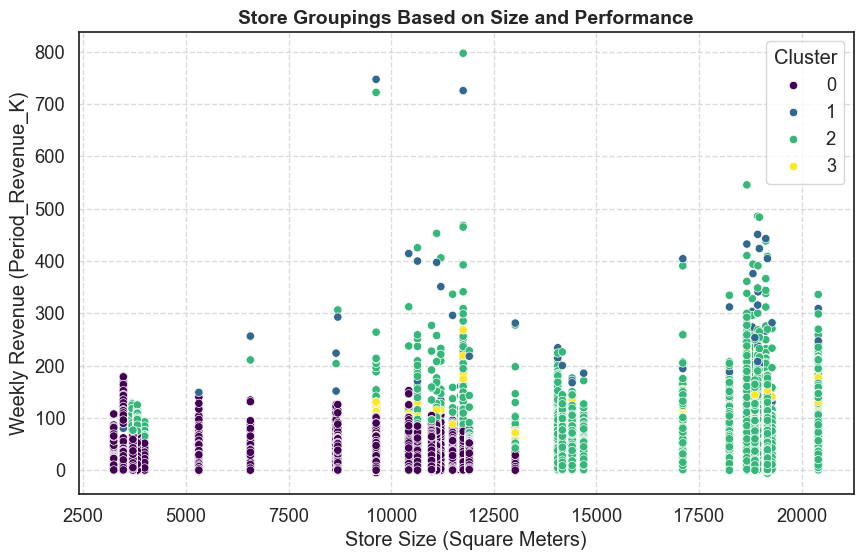

           Outlet_ID  Category  Square_Meters                   Week_Period  \
Cluster                                                                       
0        1023.481823  1.535800    7898.260305 2016-06-07 02:16:18.787966464   
1        1019.483755  1.417569   14407.636181 2016-11-25 00:00:00.000000000   
2        1020.995986  1.002960   17623.007900 2016-05-22 20:06:45.786862336   
3        1020.768431  1.324032   15827.556757 2017-03-19 01:22:30.185750784   

          Avg_Temp  Gas_Cost_per_Liter  Promo1_Percent  Promo2_Percent  \
Cluster                                                                  
0        16.079258            0.890358     1935.724213      393.604431   
1         8.602808            0.905058     1037.214966      301.547276   
2        15.771546            0.877807     2954.910021      474.252921   
3        10.973784            0.940944    28090.345594    15901.145547   

         Promo3_Percent  Promo4_Percent  Promo5_Percent  Price_Index  \
Cluster 

In [731]:
columns = ['Square_Meters', 'Category', 'Period_Revenue_K', 'Price_Index', 
           'Jobless_Rate', 'Promo1_Percent', 'Promo2_Percent', 'Promo3_Percent', 
           'Promo4_Percent', 'Promo5_Percent', 'Special_Week']

if 'Category' in all_tables.columns:
    encoder = LabelEncoder()
    all_tables['Category'] = encoder.fit_transform(all_tables['Category'])

# Standardize numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_tables[columns])

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose number of clusters
all_tables['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(x=all_tables['Square_Meters'], y=all_tables['Period_Revenue_K'], hue=all_tables['Cluster'], palette='viridis')
plt.title("Store Groupings Based on Size and Performance", fontsize=14, weight='bold')
plt.xlabel("Store Size (Square Meters)")
plt.ylabel("Weekly Revenue (Period_Revenue_K)")
plt.legend(title="Cluster")
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

# Summarize cluster characteristics
cluster_summary = all_tables.groupby('Cluster').mean()
print(cluster_summary)

The clusters for the different variables have been formed as above.
These are the different segmentations of the store.